# Starbucks Prediction
### 2019 July 8
`Group 2`

In [1]:
# beginning off by importing our libraries, as per usual
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import statsmodels.formula.api as smf

from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB   #import Gaussian Bayes modeling function
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from pandas import read_excel

%matplotlib inline

In [2]:
macrotr = "MacroTrends_Data_SBUX.csv"

stockAll = pd.read_csv(macrotr)
print(stockAll.head(),
      '\n-------\n',
      stockAll.tail())

         date    open    high     low   close     volume
0  1992-06-26  0.3281  0.3477  0.3203  0.3359  224358400
1  1992-06-29  0.3398  0.3672  0.3320  0.3594   58732800
2  1992-06-30  0.3672  0.3711  0.3438  0.3477   34777600
3  1992-07-01  0.3516  0.3594  0.3398  0.3555   18316800
4  1992-07-02  0.3594  0.3594  0.3477  0.3555   13996800 
-------
             date   open     high    low  close   volume
6801  2019-06-28  83.56  83.9600  83.32  83.83  6735620
6802  2019-07-01  84.62  84.9600  84.03  84.55  7940539
6803  2019-07-02  84.74  85.5900  84.52  85.51  6206087
6804  2019-07-03  86.04  87.8200  85.98  87.79  7818552
6805  2019-07-05  87.50  87.8855  86.88  87.79  5733239


In [3]:
sale1 = "sales.csv"            # not the most useful, but alright
sales = pd.read_csv(sale1)
sales

,Year,Revenue in billion U.S. dollars
0,2003,4.10
1,2004,5.30
2,2005,6.40
3,2006,7.80
4,2007,9.40
5,2008,10.40
6,2009,9.80
7,2010,10.70
8,2011,11.70
9,2012,13.30


In [4]:
coff33 = "coffee_price.csv"
cofe = pd.read_csv(coff33)
print(cofe.head(),
      '\n-----\n',
      cofe.tail())

         date  coffeePrice
0  1973-08-20       0.6735
1  1973-08-21       0.6710
2  1973-08-22       0.6580
3  1973-08-23       0.6675
4  1973-08-24       0.6660 
-----
              date  coffeePrice
11485  2019-07-02       1.0965
11486  2019-07-03       1.1365
11487  2019-07-04       1.1365
11488  2019-07-05       1.1110
11489  2019-07-08       1.0640


In [5]:
cofe = cofe[cofe['date'] > '1992-06-26']

In [6]:
cofe.head()

,date,coffeePrice
4715,1992-06-29,0.5774
4716,1992-06-30,0.5760
4717,1992-07-01,0.5940
4718,1992-07-02,0.6000
4719,1992-07-06,0.5930


In [7]:
cofeAll = pd.merge(stockAll, cofe, on='date')

In [8]:
print(cofeAll.head(),
      '\n-----\n',
      cofeAll.tail())

         date    open    high     low   close    volume  coffeePrice
0  1992-06-29  0.3398  0.3672  0.3320  0.3594  58732800       0.5774
1  1992-06-30  0.3672  0.3711  0.3438  0.3477  34777600       0.5760
2  1992-07-01  0.3516  0.3594  0.3398  0.3555  18316800       0.5940
3  1992-07-02  0.3594  0.3594  0.3477  0.3555  13996800       0.6000
4  1992-07-06  0.3516  0.3555  0.3477  0.3555   5753600       0.5930 
-----
             date   open     high    low  close   volume  coffeePrice
6762  2019-06-28  83.56  83.9600  83.32  83.83  6735620       1.0921
6763  2019-07-01  84.62  84.9600  84.03  84.55  7940539       1.1135
6764  2019-07-02  84.74  85.5900  84.52  85.51  6206087       1.0965
6765  2019-07-03  86.04  87.8200  85.98  87.79  7818552       1.1365
6766  2019-07-05  87.50  87.8855  86.88  87.79  5733239       1.1110


In [9]:
#cofeAll.to_csv("coffee_and_stock.csv", index=False, header=True)

In [10]:
cofeAll.head()

,date,open,high,low,close,volume,coffeePrice
0,1992-06-29,0.3398,0.3672,0.3320,0.3594,58732800,0.5774
1,1992-06-30,0.3672,0.3711,0.3438,0.3477,34777600,0.5760
2,1992-07-01,0.3516,0.3594,0.3398,0.3555,18316800,0.5940
3,1992-07-02,0.3594,0.3594,0.3477,0.3555,13996800,0.6000
4,1992-07-06,0.3516,0.3555,0.3477,0.3555,5753600,0.5930


In [11]:
cofeAll['coffeePrice'].dtype

dtype('float64')

---
## Messing Around With Coffee/Stock Influence


In [12]:
cofeAll.corr()

,open,high,low,close,volume,coffeePrice
open,1.000000,0.999945,0.999939,0.999886,-0.252771,0.182760
high,0.999945,1.000000,0.999919,0.999951,-0.251152,0.182800
low,0.999939,0.999919,1.000000,0.999938,-0.254225,0.182665
close,0.999886,0.999951,0.999938,1.000000,-0.252466,0.182749
volume,-0.252771,-0.251152,-0.254225,-0.252466,1.000000,-0.009751
coffeePrice,0.182760,0.182800,0.182665,0.182749,-0.009751,1.000000


In [13]:
# Ordinary Least Squares linear regression on volumes impact on stock price
# assuming that more trades = more flux
result = smf.ols('close ~ volume', data=cofeAll).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     460.6
Date:                Tue, 09 Jul 2019   Prob (F-statistic):           6.82e-99
Time:                        13:54:24   Log-Likelihood:                -29786.
No. Observations:                6767   AIC:                         5.958e+04
Df Residuals:                    6765   BIC:                         5.959e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.3936      0.366     66.710      0.0

In [14]:
result2 = smf.ols('close ~ coffeePrice',data=cofeAll).fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     233.7
Date:                Tue, 09 Jul 2019   Prob (F-statistic):           6.68e-52
Time:                        13:54:25   Log-Likelihood:                -29894.
No. Observations:                6767   AIC:                         5.979e+04
Df Residuals:                    6765   BIC:                         5.981e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.8471      0.675     13.102      

### Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
cofStok = cofeAll.drop(['open','high','low'], axis=1)

In [18]:
cofStok.head()

,date,close,volume,coffeePrice
0,1992-06-29,0.3594,58732800,0.5774
1,1992-06-30,0.3477,34777600,0.5760
2,1992-07-01,0.3555,18316800,0.5940
3,1992-07-02,0.3555,13996800,0.6000
4,1992-07-06,0.3555,5753600,0.5930


In [49]:
cofStok.tail()

,date,close,volume,coffeePrice
6762,2019-06-28,83.83,6735620,1.0921
6763,2019-07-01,84.55,7940539,1.1135
6764,2019-07-02,85.51,6206087,1.0965
6765,2019-07-03,87.79,7818552,1.1365
6766,2019-07-05,87.79,5733239,1.1110


In [19]:
#cofStok.to_csv("coffee_stock_cleaned.csv", index=False, header=True)

In [20]:
# setting up our X variable (here the stock price)
X = cofStok.drop(['close','date'], axis=1)

In [21]:
lm.fit(X, cofStok['close'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
print('Estimated intercept coefficient: ',lm.intercept_)

Estimated intercept coefficient:  14.854728245478157


In [23]:
lm.score(X, cofStok['close'])

0.09624571904650459

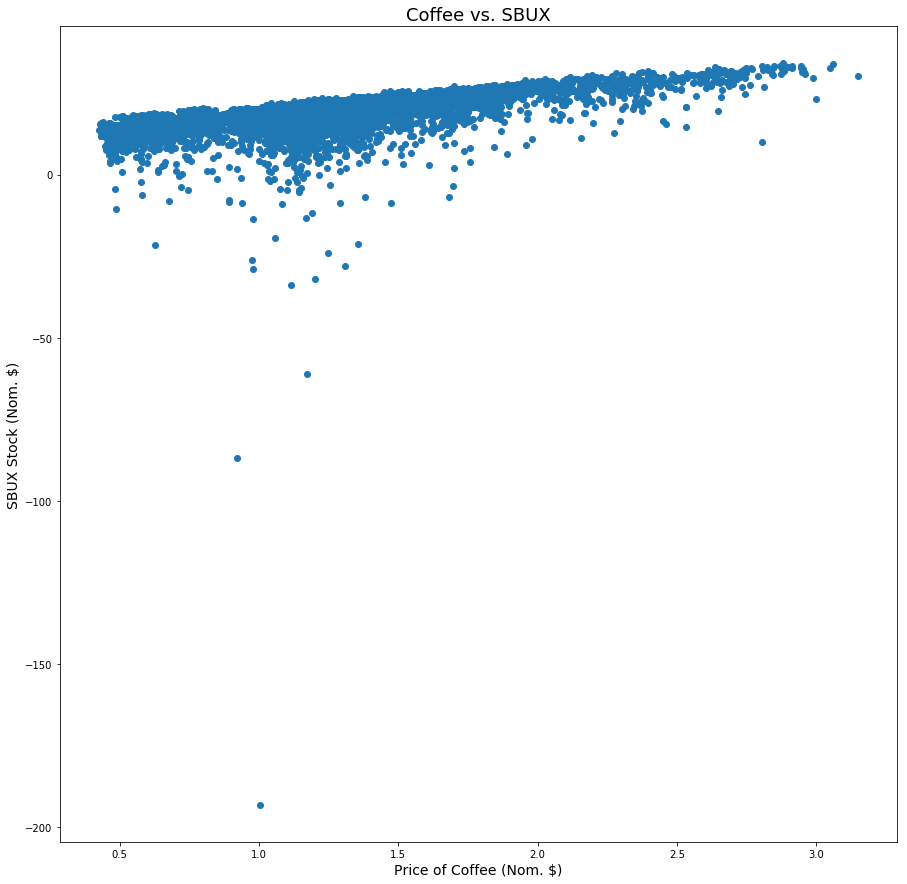

In [24]:
plt.figure(figsize=(15,15))
plt.scatter(cofStok['coffeePrice'],lm.predict(X))
plt.xlabel("Price of Coffee (Nom. $)", fontsize=14)
plt.ylabel("SBUX Stock (Nom. $)", fontsize=14)
plt.title("Coffee vs. SBUX", fontsize=18)

plt.savefig("coffee_sbux_chart1.png")

In [25]:
cofStok.head()

,date,close,volume,coffeePrice
0,1992-06-29,0.3594,58732800,0.5774
1,1992-06-30,0.3477,34777600,0.5760
2,1992-07-01,0.3555,18316800,0.5940
3,1992-07-02,0.3555,13996800,0.6000
4,1992-07-06,0.3555,5753600,0.5930


```py
#t = cofStok['date']
#s = cofStok['close']
#s2 = cofStok['coffeePrice']

plt.plot(x=cofStok['date'], y = cofStok['close'], y2 = cofStok['coffeePrice'])

plt.xlabel('Date')
plt.ylabel('Price (Nom. $)')
plt.title('SBUX Stock Over Time')
plt.grid(True)
plt.show()

```

In [29]:
print("Done")

Done


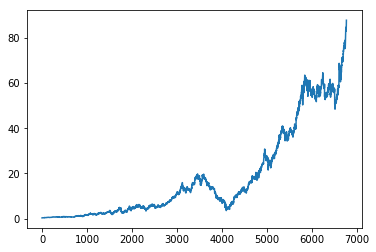

In [30]:
plt.plot(cofStok['close'])

In [66]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [62]:
sns.reset_orig()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


Text(0.5, 0, 'Date: 1992-06-08 --- 2019-06-05')

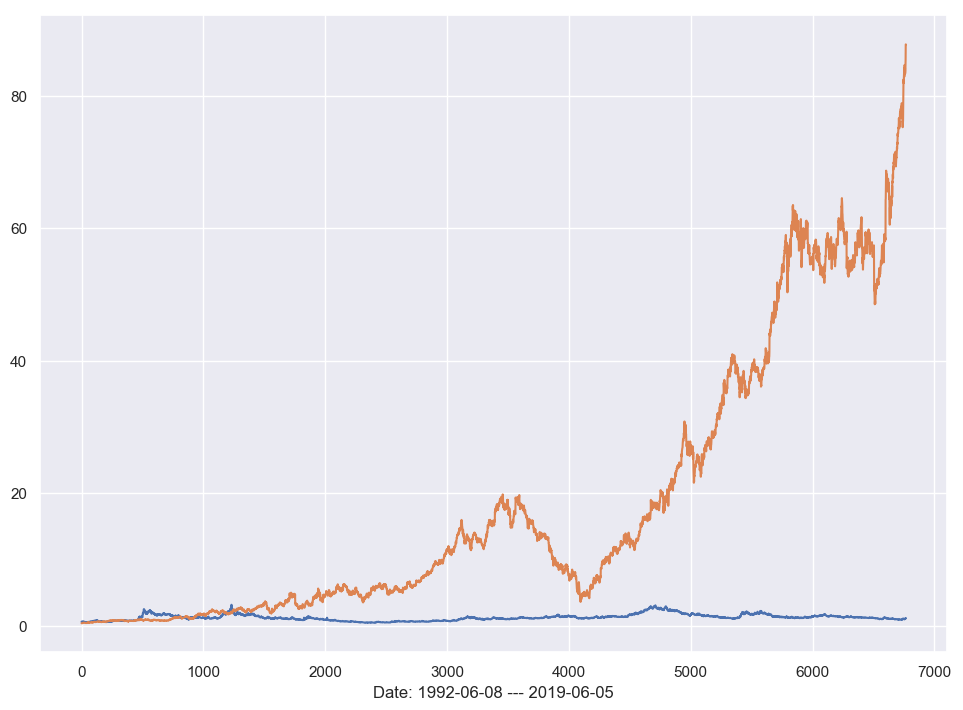

In [67]:
#plt.figure(figsize=(15,15))
plt.plot(cofStok['coffeePrice'])
plt.plot(cofStok['close'])


plt.xlabel('Date: 1992-06-08 --- 2019-06-05')

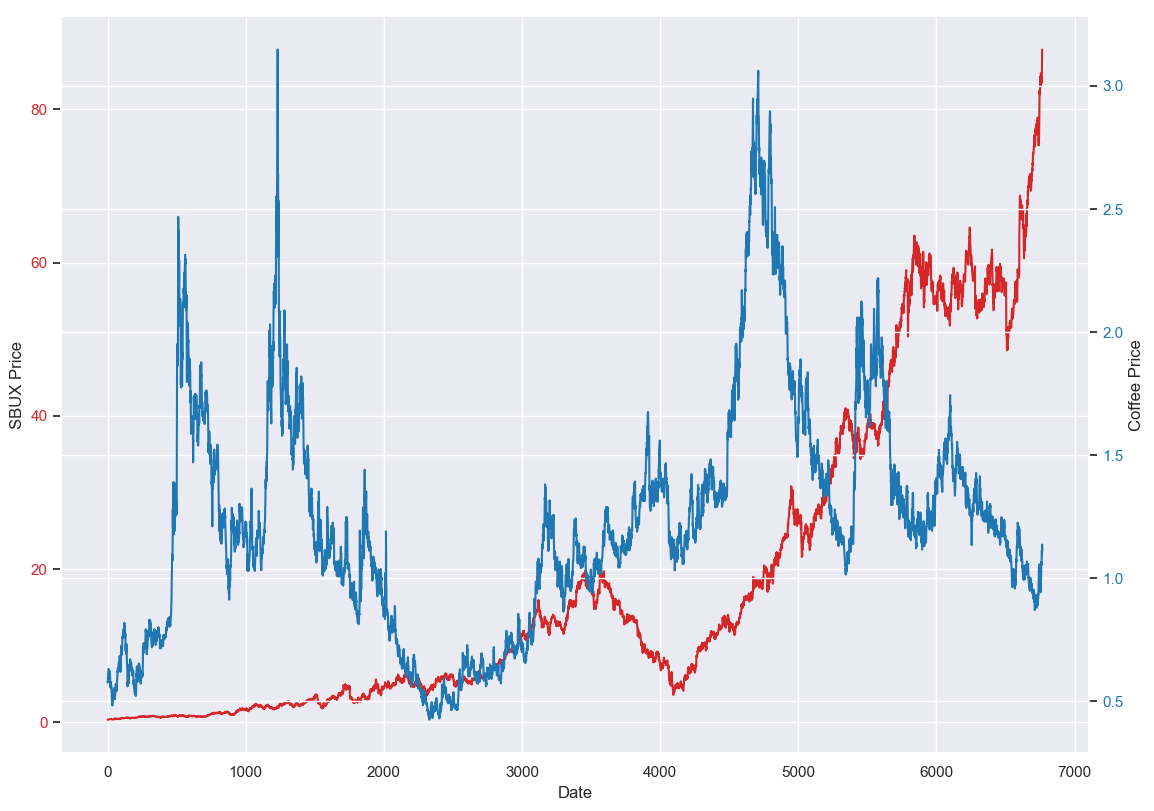

<Figure size 1500x1500 with 0 Axes>

In [70]:


fig, ax1 = plt.subplots()

plt.figure(figsize=(15,15))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('SBUX Price')
ax1.plot(cofStok['close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Coffee Price')
ax2.plot(cofStok['coffeePrice'], color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()

#fig.savefig("stock-and-coffee_price.png")